# ОИАД. Теория к лабораторной №3

## Типы признаков

* **Количественные/непрерывные** - бесконечное число значений или, по крайней мере, очень много. Например, рост человека, зарпалата.
* **Бинарные** - всего 2 значения. Например, пол: мальчик, девочка.
* **Категориальные/номинальные** - принимают конечное число значений. Значения нельзя упорядочить. Наример, уровни должности, грейды. (Старший специалист > стажера)
* **Порядковые/ранговые** - конечное число значений, можно упорядочить. Например, цвета, города (Нельзя сказать, что красный > зеленого).

## Преобразование признаков в численные
**Бинарные**
Одно из значений заменяют $1$, другое $0$.

**Порядковые**
Порядковые признаки можно просто пронумеровать. Это сохранит порядок среди значений.

| X                  |
| ------------------ |
| младший специалист |
| старший специалист |
| среднийспециалист  |
| босс               |

$\rightarrow$
| X   |
| --- |
| 1   |
| 3   |
| 2   |
| 4   |

*Какой недостаток у такого подхода?*

**Номинальные**
Под каждое уникальное значение признака создается столбец. У каждого объекта в столбец, отвечающий за соотвествующее значение, ставится $1$, в остальные - $0$.

| X       |
| ------- |
| Красный |
| Синий   | 
| Красный |
| Зеленый |

$\rightarrow$

| Красный | Синий | Зеленый |
| ------- | ----- | ------- |
| 1       | 0     | 0       |
| 0       | 1     | 0       |
| 1       | 0     | 0       |
| 0       | 0     | 1       |

## Многомерная линейная регрессия

Матрица объекты-признаки $X$ размера $\ell \times n$, где $\ell$ - чило объектов выборке, а каждый оъект описывается $n$ признаками. Будем считать, что среди признаков есть константа.
Параметры модели $w$ - вектор стобец размера $n$.

Модель регрессии
$$
f(x, w) = \sum_{i=1}^{n} w_i x_i = Xw
$$

Функционал потерь
$$
Q(w) = \sum_{i=1}^{\ell} (f(x_i, w) - y_i)^2 = ||Xw - y||^2 \rightarrow \min_{w} 
$$

Градиент функционала потерь
$$
\frac{\partial Q}{\partial w} = 2X^T(Xw-y)
$$

**Аналитическое решение**
Для поиска точки минимума, приравниваем градиент к нулю.
$$
2X^T(Xw-y) = 0
$$

$$
X^TXw = X^Ty
$$

$$
w^* = (X^TX)^{-1}X^Ty
$$

*В каких случаях могут возникнуть проблемы с решением?*

**Численное решение**
Подобные оптимизационные задачи решаются градиентными методами. Основная идея состоит в итерационном движении от одной точки к другой в пространстве параметров модели. Направление движения определяется с помощью градиента функции. Градиент функции в некоторой точке указывает направление наискорейшего роста. Мы же хотим минимизировать функцию, поэтому направление выберем как минус градиент в этой точке. Размер шага будет определятся абсолютным значением градиента в точке и некоторым параметром.

## Градиентные методы
**Метод градиентного спуска**
Классический метод градиентного спуска. Другие методы модифицируют его, внося изменения в подход к определению размеру или направлению шага.

$w^{(0)}$ - начальное приближение
$\lambda$ - размер градиентного шага

$w^{(k+1)} = w^{(k)} - \lambda \cdot \frac{\partial Q}{\partial w}|_{w=w^{(k)}}$

Остановка просходит в случаях:
* градиент близок к нулю
* изменение параметров близко к нулю
* достигнуто ограничительное число итераций
  
**Стохастический градиентный спуск**
Идея состоит в расчете не точного значения градиента $\frac{\partial Q}{\partial w}|_{w=w^{(k)}}$ на всей выборке $X$ размера $\ell$, а оценке его значения по части выборки $\tilde{X} \subset X$ меньшего размера $\tilde{\ell} < \ell$.

*Какое преимущество имеет этот метод по сравнению с классическим?*

## Регуляризация
В случае сильной корреляции между признаками (столбцами матрицы $X$), обращение матрицы $(X^TX)^{-1}$ ведет к увеличению её абсолютных значений (а в случае полной линейной зависимости - вообще необратимости), и в результате веса модели становятся большими по модулю и неустойчивыми.
Бороться с этим эффектом можно с помощью регуляризации. В функционал ошибки добавляют слагаемое, пропорциональное норме весов. Таким образом можно получить различные модификации регрессионной модели. 

**Гребневая регрессия**
$$
Q_{L_2}(w) = ||Xw - y||^2 + \alpha ||w||_2^2 \rightarrow \min_{w}
$$

$$
||a||_2 = \sqrt{\sum_{i=1}^{n} a_i^2}
$$

Имеет аналитическое решение
$$
w^* = (X^TX + \alpha I)^{-1}X^Ty
$$
где $I$ - единичная матрица

Градиент
$$
\frac{\partial Q_{L_2}}{\partial w} = 2 X^T (Xw - y) + 2 \alpha w
$$


**LASSO (Least Absolute Shrinkage and Selection Operator)**
$$
Q_{L_1}(w) = ||Xw - y||^2 + \beta ||w||_1 \rightarrow \min_{w}
$$

$$
||a||_1 = \sum_{i=1}^{n} |a_i|
$$

Эта задача не имеет аналитического решения

$$
\frac{\partial Q_{L_1}}{\partial w} = 2 X^T (Xw - y) + \beta~sign(w)
$$

## Оценка обобщающей способности
Построение регрессионной модели и оценка ее качества на одних и тех же данных не покажет, сохранится ли её качество на новых данных.
Поэтому набор данных случайным образо разбивают на 2 выборки: 
* обучающую, на которой подбирают параметры модели
* тестовую, на которой оценивают качество

# ОИАД. Лабораторная работа №3

https://www.kaggle.com/datasets/mosapabdelghany/medical-insurance-cost-dataset?resource=download

## 1. Подготовка данных
1. проверить наличие пропусков и выбросов
2. привести категориальные признаки к числовым
3. вычислить парные корреляции признаков

## 2. Многомерная линейная регрессия
Построить модель линейной регрессии и подобрать параметры:
1. аналитически (реализовать самому)
2. численно, с помощью методов градиентного спуска (реализовать самому)

## 3. Добавление регуляризации
Модифицировать линейную модель путем добавления регуляризационного слагаемого. Найти оптимальные веса:
1. аналитически
2. численно

## 4. Оценка обобщающей способности
Сравнить между собой модели на тестовых данных по среднему квадрату ошибки:
1. константную - прогноз средним значением
2. из пункта 2
3. из пункта 3

In [1]:
import numpy as np
import pandas as pd

def load_data(train_path='insurance_train.csv', test_path='insurance_test.csv'):
    train = pd.read_csv(train_path)
    test = pd.read_csv(test_path)
    return train, test

train_df, test_df = load_data()
print(train_df)

     age     sex     bmi  children smoker     region      charges
0     61    male  38.380         0     no  northwest  12950.07120
1     59  female  34.800         2     no  southwest  36910.60803
2     31    male  30.875         0     no  northeast   3857.75925
3     24  female  33.345         0     no  northwest   2855.43755
4     31    male  28.500         5     no  northeast   6799.45800
..   ...     ...     ...       ...    ...        ...          ...
995   42  female  24.985         2     no  northwest   8017.06115
996   50  female  46.090         1     no  southeast   9549.56510
997   20  female  21.800         0    yes  southwest  20167.33603
998   32  female  44.220         0     no  southeast   3994.17780
999   52  female  44.700         3     no  southwest  11411.68500

[1000 rows x 7 columns]


# 1. Подготовка данных
1. проверить наличие пропусков и выбросов

In [2]:
def inspect_data(df):
    print("\nMissing values per column:\n", df.isna().sum())
    num = df.select_dtypes(include=[np.number])
    for col in num.columns:
        Q1 = num[col].quantile(0.25)
        Q3 = num[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        n_out = ((num[col] < lower) | (num[col] > upper)).sum()
        if n_out > 0:
            print(f"Outliers in {col}: {n_out} out of {len(df)}")

inspect_data(train_df)
inspect_data(test_df)


Missing values per column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Outliers in bmi: 4 out of 1000
Outliers in charges: 112 out of 1000

Missing values per column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Outliers in bmi: 5 out of 338
Outliers in charges: 19 out of 338


2. привести категориальные признаки к числовым

In [3]:
def get_categorical_columns(df):
    return df.select_dtypes(include=['object', 'category']).columns.tolist()

print(get_categorical_columns(train_df))


['sex', 'smoker', 'region']


In [4]:
def label_encode(df, cat_cols = None):
    if cat_cols is None:
        cat_cols = get_categorical_columns(df)
    df2 = df.copy()
    mappings = {}
    for col in cat_cols:
        df2[col] = df2[col].astype('category')
        mapping = {cat: code for code, cat in enumerate(df2[col].cat.categories)}
        df2[col] = df2[col].cat.codes
        mappings[col] = mapping
    return df2, mappings

def one_hot_encode(df, cat_cols = None, drop_first = True):
    if cat_cols is None:
        cat_cols = get_categorical_columns(df)
    df2 = df.copy()
    df2 = pd.get_dummies(df2, columns=cat_cols, drop_first=drop_first,  dtype=int)
    return df2

#train_df_2 = one_hot_encode(train_df)
#test_df_2 = one_hot_encode(test_df)
train_df_2, mappings = label_encode(train_df)
test_df_2, mappings = label_encode(test_df)
print(train_df_2)
print(mappings)

     age     bmi  children      charges  sex_male  smoker_yes  \
0     61  38.380         0  12950.07120         1           0   
1     59  34.800         2  36910.60803         0           0   
2     31  30.875         0   3857.75925         1           0   
3     24  33.345         0   2855.43755         0           0   
4     31  28.500         5   6799.45800         1           0   
..   ...     ...       ...          ...       ...         ...   
995   42  24.985         2   8017.06115         0           0   
996   50  46.090         1   9549.56510         0           0   
997   20  21.800         0  20167.33603         0           1   
998   32  44.220         0   3994.17780         0           0   
999   52  44.700         3  11411.68500         0           0   

     region_northwest  region_southeast  region_southwest  
0                   1                 0                 0  
1                   0                 0                 1  
2                   0                 0

In [5]:
def compute_correlations(df, method = 'pearson'):
    #method{‘pearson’, ‘kendall’, ‘spearman’} or callable
    num_df = df.select_dtypes(include=[np.number])
    corr = num_df.corr(method=method)
    return corr

#===============================================
pd.options.display.float_format = '{:.2f}'.format
#===============================================

print("Pearson")
print(compute_correlations(train_df_2))
print("Kendall")
print(compute_correlations(train_df_2, 'kendall'))
print("Spearman")
print(compute_correlations(train_df_2, 'spearman'))


Pearson
                   age   bmi  children  charges  sex_male  smoker_yes  \
age               1.00  0.12      0.04     0.30     -0.01       -0.04   
bmi               0.12  1.00     -0.01     0.19      0.05       -0.01   
children          0.04 -0.01      1.00     0.07      0.02        0.01   
charges           0.30  0.19      0.07     1.00      0.06        0.79   
sex_male         -0.01  0.05      0.02     0.06      1.00        0.06   
smoker_yes       -0.04 -0.01      0.01     0.79      0.06        1.00   
region_northwest  0.02 -0.12      0.04    -0.04     -0.00       -0.05   
region_southeast  0.00  0.24     -0.04     0.10      0.02        0.10   
region_southwest -0.01 -0.00      0.02    -0.04      0.01       -0.03   

                  region_northwest  region_southeast  region_southwest  
age                           0.02              0.00             -0.01  
bmi                          -0.12              0.24             -0.00  
children                      0.04        

# Можно предположить что сильную корелляцию имеют только параметры smoker и charges

## 2. Многомерная линейная регрессия
Построить модель линейной регрессии и подобрать параметры:
1. аналитически (реализовать самому)

In [6]:
def prepare_data(df):
    # Целевая переменная
    y = df['charges'].values

    # Копия без целевой
    X = df.drop(columns=['charges']).copy()

    #bias
    #X = np.hstack([np.ones((X.shape[0], 1)), X.values])

    return X, y

train_preped, y = prepare_data(train_df_2)
test_preped, y_test = prepare_data(test_df_2)

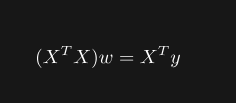

In [7]:
def normal_equation(X, y):
    #w = (X^T X)^(-1) X^T y
    XT = X.T #транспонированая матрица
    w = np.linalg.inv(XT @ X) @ XT @ y
    return w

w_analytic = normal_equation(train_preped, y)
print(w_analytic)

0     205.35
1      59.02
2     261.99
3    -444.83
4   23416.98
5   -1719.47
6   -1241.77
7   -1836.11
dtype: float64


# Оценка модели

In [8]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

#print(test_preped.shape)
#print(w_analytic.shape)
y_pred_analytic = test_preped.values @ w_analytic

mse_analytic = mse(y_test, y_pred_analytic)
print("=== Analytical ===")
print("MSE:", round(mse_analytic, 2))

=== Analytical ===
MSE: 48389895.97


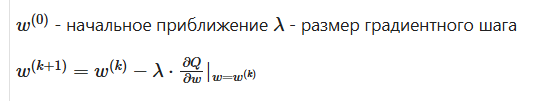
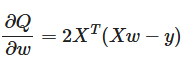

In [9]:
def gradient_descent(X, y, lr = 1e-5, n_iter = 10000):
    n, d = X.shape
    w = np.zeros(d)
    losses = []

    for i in range(n_iter):
        y_pred = X @ w
        error = y_pred - y
        grad = (2/n) * X.T @ error
        w -= lr * grad
        loss = (error**2).mean()
        losses.append(loss)

        if i % (n_iter // 5) == 0:
            print(f"Iter {i:5d}: loss={loss:.4f}")

    return w, losses

w_gd, losses = gradient_descent(train_preped, y, lr=0.0001, n_iter=20000)
print(w_gd)
y_pred_gd = test_preped @ w_gd
mse_gd = mse(y_test, y_pred_gd)
print("\n=== Gradient ===")
print("MSE на тесте:", round(mse_gd, 2))
print("Последний loss на train:", round(losses[-1], 2))

Iter     0: loss=309422597.1575
Iter  4000: loss=105434855.9558
Iter  8000: loss=90185107.7347
Iter 12000: loss=78461392.5908
Iter 16000: loss=69418406.4205
age                  205.50
bmi                   85.79
children             356.31
sex_male             306.07
smoker_yes         10960.66
region_northwest    -605.94
region_southeast     586.83
region_southwest    -586.05
dtype: float64

=== Gradient ===
MSE на тесте: 76165451.37
Последний loss на train: 62430044.24


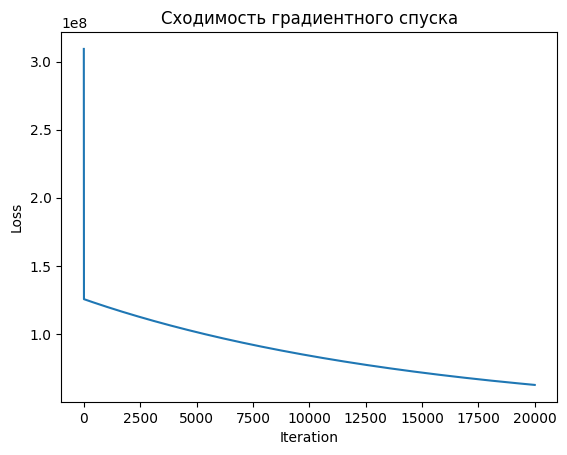

In [10]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("Сходимость градиентного спуска")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 3. Добавление регуляризации
Модифицировать линейную модель путем добавления регуляризационного слагаемого. Найти оптимальные веса:

аналитически

численно

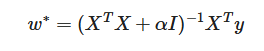

In [11]:
def regularization_analytic(X, y, alpha = 1.0):

    n, d = X.shape
    Xb = np.hstack([np.ones((n, 1)), X])  # добавляем bias
    D = Xb.shape[1]
    I = np.eye(D)
    I[0, 0] = 0.0 
        
    w = np.linalg.pinv(Xb.T @ Xb + alpha * I) @ (Xb.T @ y)
    return w

In [12]:
w_regular_analytic = regularization_analytic(train_preped, y, alpha=0.5)

In [13]:
print(w_regular_analytic)
n = test_preped.shape[0]
test_preped_b = np.hstack([np.ones((n,1)), test_preped])
y_pred_regular_analytic = test_preped_b @ w_regular_analytic
mse_analytic_reg = mse(y_test, y_pred_regular_analytic)
print("=== Analytical with regularization ===")
print("MSE:", round(mse_analytic_reg, 2))

[-12119.57092157    257.38462546    337.16034616    467.21951527
     45.12742959  23914.17082643   -421.33872132   -962.99769291
   -833.91248051]
=== Analytical with regularization ===
MSE: 44738800.75


# MSE с регуляризацией стало меньше чем без регуляризации

In [14]:
def regularization_gradient_descent(X, y, alpha=1.0, lr=1e-5, n_iter=10000):
    n, d = X.shape
    # Добавляем столбец единиц для bias (intercept)
    X_with_bias = np.hstack([np.ones((n, 1)), X])
    D = X_with_bias.shape[1]  # новая размерность (d + 1)
    w = np.zeros(D)
    losses = []

    for i in range(n_iter):
        # Прямое распространение
        y_pred = X_with_bias @ w
        error = y_pred - y
        
        # Функция потерь с L2 регуляризацией (исключая bias)
        loss = (error**2).mean() + alpha * (w[1:]**2).mean()
        losses.append(loss)
        
        # Градиент
        grad = (2/n) * X_with_bias.T @ error
        # Добавляем регуляризацию только для весов (не для bias)
        grad_reg = 2 * alpha * np.hstack([0, w[1:]]) / n
        grad += grad_reg
        
        # Обновление весов
        w -= lr * grad

        if i % (n_iter // 5) == 0:
            print(f"Iter {i:5d}: loss={loss:.4f}")

    return w, losses

In [15]:
w_gd_reg, losses2 = regularization_gradient_descent(train_preped, y, alpha=0.1, lr=1e-4, n_iter=100000)

Iter     0: loss=309422597.1575
Iter 20000: loss=63479302.4010
Iter 40000: loss=47497453.1300
Iter 60000: loss=43350869.4552
Iter 80000: loss=42260080.0354


In [16]:
print(w_gd_reg)
n = test_preped.shape[0]
test_preped_b = np.hstack([np.ones((n,1)), test_preped])
y_pred_regular_grad = test_preped_b @ w_gd_reg
mse_grad_reg = mse(y_test, y_pred_regular_grad)
print("=== Gradient with regularization ===")
print("MSE:", round(mse_grad_reg, 2))

[-4637.73959016   225.25672881   159.96193302   346.20965637
  -164.65795046 22500.95760343  -912.63842563  -522.26384589
 -1084.69726884]
=== Gradient with regularization ===
MSE: 46228335.8


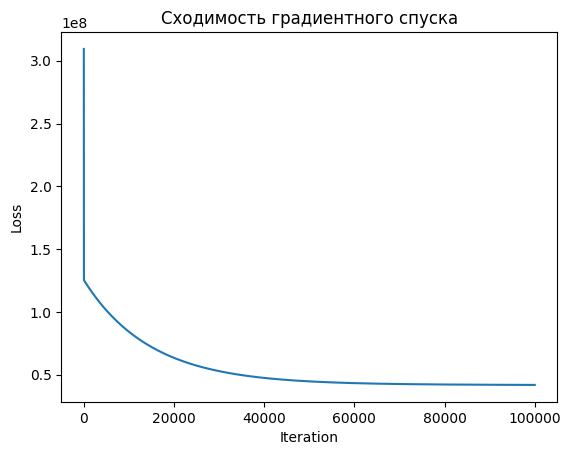

In [17]:
import matplotlib.pyplot as plt
plt.plot(losses2)
plt.title("Сходимость градиентного спуска")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

## 4. Оценка обобщающей способности
Сравнить между собой модели на тестовых данных по среднему квадрату ошибки:
1. константную - прогноз средним значением
2. из пункта 2
3. из пункта 3

In [18]:
def baseline_constant_mse(y_train, y_test):
    y_pred = np.full_like(y_test, y_train.mean())
    mse1 = mse(y_test, y_pred)
    return mse1

mse_baseline = baseline_constant_mse(y, y_test)
print(mse_baseline)

164374128.13344663


In [19]:
print("=== Оценка моделей по MSE ===")
print(f"Константная модель: {mse_baseline:,.4f}")
print(f"Линейная регрессия аналитически: {mse_analytic:,.4f}")
print(f"Линейная регрессия градиентный спуск: {mse_gd:,.4f}")
print(f"Линейная регрессия аналитически с регуляризацией: {mse_analytic_reg:,.4f}")
print(f"Линейная регрессия градиентный спуск с регуляризацией: {mse_grad_reg:,.4f}")

=== Оценка моделей по MSE ===
Константная модель: 164,374,128.1334
Линейная регрессия аналитически: 48,389,895.9722
Линейная регрессия градиентный спуск: 76,165,451.3686
Линейная регрессия аналитически с регуляризацией: 44,738,800.7488
Линейная регрессия градиентный спуск с регуляризацией: 46,228,335.7967
